# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
#Importing Modules 
import os
import csv
import matplotlib as matplot
import json 
import pandas as pd
import numpy as np
import requests
from matplotlib import pyplot as plt
from scipy.stats import linregress
from api_keys import weather_api_key

#Importing City Cordinate Library 
from citipy import citipy

## Generate Cities List

In [3]:
#Defining variables as lists 
city_list = []
cordinates = []

#Making a random list of 600 cities 
np.random.seed(14949)

#Picking numbers within the range of latitudes 
lat = np.random.randint(-90, 90, size = 1700)

#Picking numbers within the range of longitudes  
long = np.random.randint(-180, 180, size = 1700)

#Putting the coridnates together 
cordinates = zip(lat, long)


for cordinates in cordinates: 
    city = citipy.nearest_city(cordinates[0], cordinates[1]).city_name
    
    if city not in city_list:
        city_list.append(city)

len(city_list)

650

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Setting variables equal to a list 
name_list = []
temp_list  = []
hum_list = []
cloud_list = []
wind_speed_list = []
lat_list = []
lon_list = []

#Setting the counter equal to a number 
counter = 1

#Setting the correct url and bulding the query url 
url =  'http://api.openweathermap.org/data/2.5/weather?'

print(f'City List')
print('-----------------------')

#Making a for loop to get the elements for each city
for city in city_list:
    try:
        query_url = url + 'appid=' + weather_api_key + '&q=' + city + '&units=imperial'
        weather_response = requests.get(query_url)
        weather_data = weather_response.json()
        
        #Making a list of all the elements needed for the Data Frame 
        name_list.append(weather_data['name'])
        temp_list.append(weather_data['main']['temp_max'])
        hum_list.append(weather_data['main']['humidity'])
        cloud_list.append(weather_data['clouds']['all'])
        wind_speed_list.append(weather_data['wind']['speed'])
        lat_list.append(weather_data['coord']['lat'])
        lon_list.append(weather_data['coord']['lon'])
        
        #Print the number of the city and the city name 
        print(f'{counter}|{city}')
        
    #Continuing to run even if the city is not found 
    except KeyError:
        
        #Printing the name of the city that does not exist on the open weather api
        print(f'{counter}|{city} does not exist')
    
    #Adding one to the counter 
    counter +=1

City List
-----------------------
1|martyush
2|la ronge
3|laguna
4|ajaccio
5|srednekolymsk
6|kodiak
7|saldanha
8|west bay
9|albany
10|georgetown
11|utevka
12|punta arenas
13|berlevag
14|carnarvon
15|port alfred
16|bredasdorp
17|kapaa
18|pingxiang
19|cerinza
20|gerash
21|kathmandu
22|tumannyy does not exist
23|rikitea
24|tostamaa does not exist
25|bandarbeyla
26|belushya guba does not exist
27|kysyl-syr
28|kaitangata
29|hermanus
30|codajas
31|mataura
32|saskylakh
33|ushibuka
34|illoqqortoormiut does not exist
35|atuona
36|leningradskiy
37|iskateley
38|nardaran
39|nelson bay
40|alofi
41|chokurdakh
42|mehamn
43|baft
44|taolanaro does not exist
45|paysandu
46|sitka
47|lebu
48|hokitika
49|cairns
50|hobart
51|raudeberg
52|pontianak
53|east london
54|boyle
55|grand centre does not exist
56|dikson
57|dom pedrito
58|cape town
59|hilo
60|husavik
61|puerto ayora
62|koscierzyna
63|leh
64|gladstone
65|saint-augustin
66|mogwase
67|kovernino
68|provideniya
69|balykshi does not exist
70|tsihombe does 

570|mentok does not exist
571|liverpool
572|morropon
573|mozarlandia
574|sao paulo de olivenca
575|great bend
576|diamantino
577|adrar
578|abu samrah
579|oum hadjer
580|linhares
581|shelburne
582|guarapari
583|porbandar
584|huarmey
585|badarganj
586|rafaela
587|melita
588|sydney
589|licata
590|vikyrovice
591|ciudad real
592|ayorou
593|wad rawah
594|quelimane
595|santa maria
596|batticaloa
597|saint-raymond
598|floro
599|makakilo city
600|storebo
601|ahipara
602|bahia honda
603|lokoja
604|singanallur
605|fredericton
606|rodrigues alves
607|chumikan
608|arrecife
609|fairbanks
610|grand-lahou
611|harmanli
612|chalmette
613|bardiyah
614|pontal do parana
615|vagur
616|kumukh
617|cayenne
618|seymchan
619|malindi
620|steamboat springs
621|griffith
622|mendahara does not exist
623|rudbar
624|dingle
625|east brainerd
626|amasya
627|cintalapa
628|takoradi
629|flinders
630|zhangye
631|krasnokholmskiy
632|rassvet
633|minsk
634|sao felix do xingu
635|tabiauea does not exist
636|jinchengjiang does n

In [5]:
#Making the city data into a dictionary
city_data = {'City':name_list,
        'Temperature °F':temp_list,
        'Humidity':hum_list,
        'Cloudiness':cloud_list,
        'Wind Speed':wind_speed_list,
        'Latitude':lat_list,
        'Longitude':lon_list}

#Converting into a data frame 
city_data_pd = pd.DataFrame(city_data)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Displaing the data frame 
city_data_pd

,City,Temperature °F,Humidity,Cloudiness,Wind Speed,Latitude,Longitude
0,Martyush,45.32,91,3,7.52,56.40,61.88
1,La Ronge,50.00,61,90,12.75,55.10,-105.28
2,Laguna,93.99,19,1,8.05,38.42,-121.42
3,Arrondissement d'Ajaccio,53.60,93,74,5.82,42.00,8.92
4,Srednekolymsk,43.23,61,99,10.56,67.45,153.68
...,...,...,...,...,...,...,...
592,Sokoni,77.29,85,1,9.35,-6.43,39.55
593,Corinth,66.99,54,2,3.00,37.94,22.96
594,Betlitsa,58.50,45,100,9.69,54.01,33.96
595,Seoul,59.00,93,1,2.75,37.57,126.98


In [22]:
city_data_pd.to_csv('city_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#No data where the humidity > 100%
city_data_pd.loc[city_data_pd['Humidity']>100]

,City,Temperature °F,Humidity,Cloudiness,Wind Speed,Latitude,Longitude


In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

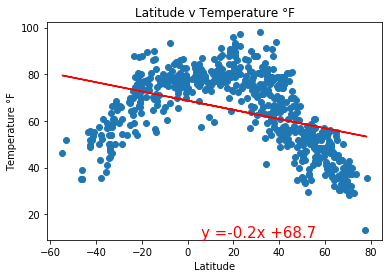

In [26]:
#Setting the x and y values 
x_values = city_data_pd['Latitude']
y_values = city_data_pd['Temperature °F']

#Solving for the linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = 'y =' + str(round(slope,2)) +'x +' + str(round(intercept,2))

#Plotting the scatter plot 
plt.scatter(x_values, y_values)

#Plotting the linear regression line 
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (6,10), fontsize = 15, color = 'red')

#Setting the labels 
plt.xlabel('Latitude')
plt.ylabel('Temperature °F')
plt.title('Latitude v Temperature °F')
plt.savefig('Latitude v Temperature °F.png')

## Latitude vs. Humidity Plot

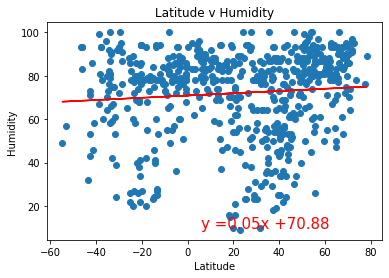

In [27]:
#Setting the x and y values 
x_values = city_data_pd['Latitude']
y_values = city_data_pd['Humidity']

#Solving for the linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = 'y =' + str(round(slope,2)) +'x +' + str(round(intercept,2))

#Plotting the scatter plot 
plt.scatter(x_values, y_values)

#Plotting the linear regression line 
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (6,10), fontsize = 15, color = 'red')

#Setting the labels 
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude v Humidity')
plt.savefig('Latitude v Humidity.png')

## Latitude vs. Cloudiness Plot

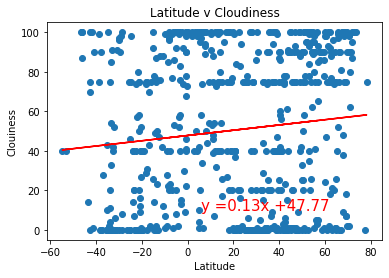

In [28]:
#Setting the x and y values 
x_values = city_data_pd['Latitude']
y_values = city_data_pd['Cloudiness']

#Solving for the linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = 'y =' + str(round(slope,2)) +'x +' + str(round(intercept,2))

#Plotting the scatter plot 
plt.scatter(x_values, y_values)

#Plotting the linear regression line 
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (6,10), fontsize = 15, color = 'red')

#Setting the labels 
plt.xlabel('Latitude')
plt.ylabel('Clouiness')
plt.title('Latitude v Cloudiness')
plt.savefig('Latitude v Cloudiness.png')

## Latitude vs. Wind Speed Plot

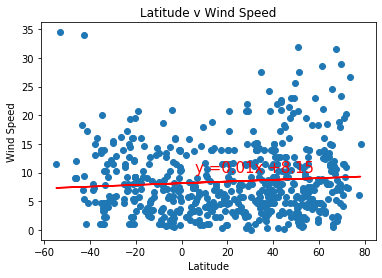

In [30]:
#Setting the x and y values 
x_values = city_data_pd['Latitude']
y_values = city_data_pd['Wind Speed']

#Solving for the linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = 'y =' + str(round(slope,2)) +'x +' + str(round(intercept,2))

#Plotting the scatter plot 
plt.scatter(x_values, y_values)

#Plotting the linear regression line 
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (6,10), fontsize = 15, color = 'red')

#Setting the labels 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude v Wind Speed')
plt.savefig('Latitude v Wind Speed.png')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

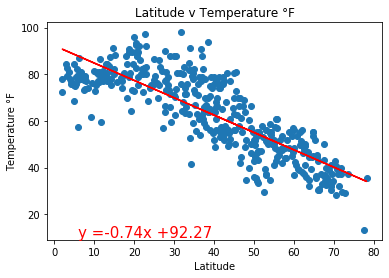

In [29]:
#Filtering only the northern hemisphere data 
north_hem_pd = city_data_pd.loc[city_data_pd['Latitude']>=0]

#Setting the x and y values 
x_values = north_hem_pd['Latitude']
y_values = north_hem_pd['Temperature °F']

#Solving for the linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = 'y =' + str(round(slope,2)) +'x +' + str(round(intercept,2))

#Plotting the scatter plot 
plt.scatter(x_values, y_values)

#Plotting the linear regression line 
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (6,10), fontsize = 15, color = 'red')

#Setting the labels 
plt.xlabel('Latitude')
plt.ylabel('Temperature °F')
plt.title('Latitude v Temperature °F')
plt.savefig('Latitude v Temperature °F (N).png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

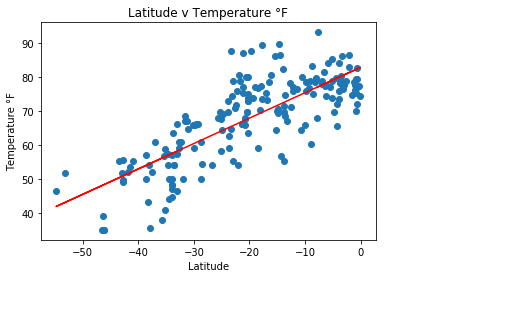

In [31]:
#Filtering only the southern hemisphere data 
south_hem_pd = city_data_pd.loc[city_data_pd['Latitude']<0]

#Setting the x and y values 
x_values = south_hem_pd['Latitude']
y_values = south_hem_pd['Temperature °F']

#Solving for the linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = 'y =' + str(round(slope,2)) +'x +' + str(round(intercept,2))

#Plotting the scatter plot 
plt.scatter(x_values, y_values)

#Plotting the linear regression line 
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (6,10), fontsize = 15, color = 'red')

#Setting the labels 
plt.xlabel('Latitude')
plt.ylabel('Temperature °F')
plt.title('Latitude v Temperature °F')
plt.savefig('Latitude v Temperature °F (S).png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

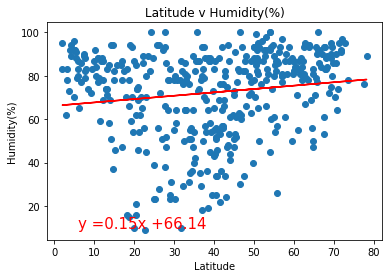

In [32]:
#Setting the x and y values 
x_values = north_hem_pd['Latitude']
y_values = north_hem_pd['Humidity']

#Solving for the linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = 'y =' + str(round(slope,2)) +'x +' + str(round(intercept,2))

#Plotting the scatter plot 
plt.scatter(x_values, y_values)

#Plotting the linear regression line 
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (6,10), fontsize = 15, color = 'red')

#Setting the labels 
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('Latitude v Humidity(%)')
plt.savefig('Latitude v Humidity(%)(N).png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

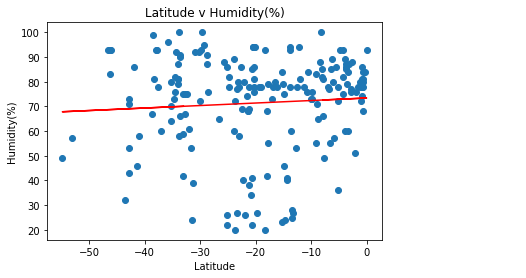

In [33]:
#Setting the x and y values 
x_values = south_hem_pd['Latitude']
y_values = south_hem_pd['Humidity']

#Solving for the linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = 'y =' + str(round(slope,2)) +'x +' + str(round(intercept,2))

#Plotting the scatter plot 
plt.scatter(x_values, y_values)

#Plotting the linear regression line 
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (6,10), fontsize = 15, color = 'red')

#Setting the labels 
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('Latitude v Humidity(%)')
plt.savefig('Latitude v Humidity(%)(S).png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

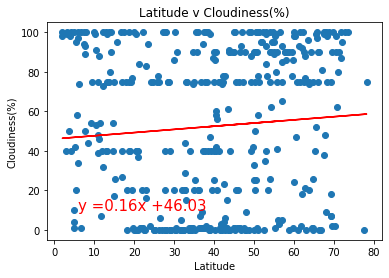

In [34]:
#Setting the x and y values 
x_values = north_hem_pd['Latitude']
y_values = north_hem_pd['Cloudiness']

#Solving for the linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = 'y =' + str(round(slope,2)) +'x +' + str(round(intercept,2))

#Plotting the scatter plot 
plt.scatter(x_values, y_values)

#Plotting the linear regression line 
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (6,10), fontsize = 15, color = 'red')

#Setting the labels 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('Latitude v Cloudiness(%)')
plt.savefig('Latitude v Cloudiness(%)(N).png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

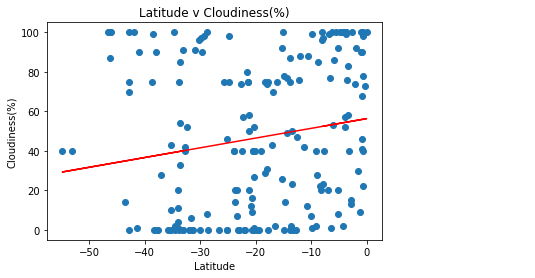

In [35]:
#Setting the x and y values 
x_values = south_hem_pd['Latitude']
y_values = south_hem_pd['Cloudiness']

#Solving for the linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = 'y =' + str(round(slope,2)) +'x +' + str(round(intercept,2))

#Plotting the scatter plot 
plt.scatter(x_values, y_values)

#Plotting the linear regression line 
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (6,10), fontsize = 15, color = 'red')

#Setting the labels 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('Latitude v Cloudiness(%)')
plt.savefig('Latitude v Cloudiness(%)(S).png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

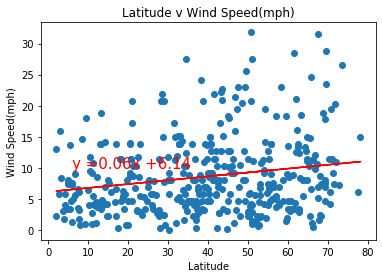

In [36]:
#Setting the x and y values 
x_values = north_hem_pd['Latitude']
y_values = north_hem_pd['Wind Speed']

#Solving for the linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = 'y =' + str(round(slope,2)) +'x +' + str(round(intercept,2))

#Plotting the scatter plot 
plt.scatter(x_values, y_values)

#Plotting the linear regression line 
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (6,10), fontsize = 15, color = 'red')

#Setting the labels 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title('Latitude v Wind Speed(mph)')
plt.savefig('Latitude v Wind Speed(mph)(N).png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

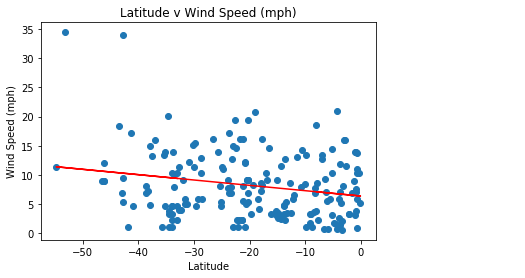

In [38]:
#Setting the x and y values 
x_values = south_hem_pd['Latitude']
y_values = south_hem_pd['Wind Speed']

#Solving for the linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = 'y =' + str(round(slope,2)) +'x +' + str(round(intercept,2))

#Plotting the scatter plot 
plt.scatter(x_values, y_values)

#Plotting the linear regression line 
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (6,10), fontsize = 15, color = 'red')

#Setting the labels 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude v Wind Speed (mph)')
plt.savefig('Latitude v Wind Speed(mph)(S).png')